In [1]:
"""
Exercise 4: Inference and Model Saving
PyTorch Workflow Fundamentals - Module 2

This exercise covers:
- Making predictions in inference mode
- Understanding model.eval() and torch.no_grad()
- Saving model state
- Loading saved models
- Evaluating on test data

Learning Mottos:
- If in doubt, run the code!
- Experiment, experiment, experiment!
- Visualize, visualize, visualize!
"""

'\nExercise 4: Inference and Model Saving\nPyTorch Workflow Fundamentals - Module 2\n\nThis exercise covers:\n- Making predictions in inference mode\n- Understanding model.eval() and torch.no_grad()\n- Saving model state\n- Loading saved models\n- Evaluating on test data\n\nLearning Mottos:\n- If in doubt, run the code!\n- Experiment, experiment, experiment!\n- Visualize, visualize, visualize!\n'

In [2]:

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os
import datetime

# Set random seed for reproducibility
torch.manual_seed(42)

In [3]:
print("=" * 60)
print("Part 1: Training a Model")
print("=" * 60)

Part 1: Training a Model


In [4]:

# TODO: Setup data
weight = 0.7
bias = 0.3
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

train_split = int(0.7 * len(X))
val_split = int(0.85 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_val, y_val = X[train_split:val_split], y[train_split:val_split]
X_test, y_test = X[val_split:], y[val_split:]

In [5]:

# TODO: Create and train model


class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self, x):
        return self.weight * x + self.bias


model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Quick training
epochs = 100
for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f"Model trained!")
print(f"Learned weight: {model.weight.item():.4f} (true: {weight})")
print(f"Learned bias: {model.bias.item():.4f} (true: {bias})")

Model trained!
Learned weight: 0.4398 (true: 0.7)
Learned bias: 0.3607 (true: 0.3)


In [6]:
print("\n" + "=" * 60)
print("Part 2: Making Predictions")
print("=" * 60)


Part 2: Making Predictions


In [6]:

# TODO: Set model to evaluation mode
model.eval()
print("Model set to evaluation mode")

Model set to evaluation mode


In [7]:

# TODO: Make predictions on test data
with torch.no_grad():
    test_predictions = model(X_test)

print(f"\nTest predictions (first 5):")
print(f"  X: {X_test[:5].flatten()}")
print(f"  Predicted: {test_predictions[:5].flatten()}")
print(f"  Actual: {y_test[:5].flatten()}")


Test predictions (first 5):
  X: tensor([0.8400, 0.8600, 0.8800, 0.9000, 0.9200])
  Predicted: tensor([0.7302, 0.7390, 0.7478, 0.7566, 0.7654])
  Actual: tensor([0.8880, 0.9020, 0.9160, 0.9300, 0.9440])


In [8]:

# TODO: Calculate test loss
test_loss = criterion(test_predictions, y_test)
print(f"\nTest Loss (MSE): {test_loss.item():.4f}")


Test Loss (MSE): 0.0311


In [10]:
print("\n" + "=" * 60)
print("Part 3: Visualizing Predictions")
print("=" * 60)


Part 3: Visualizing Predictions


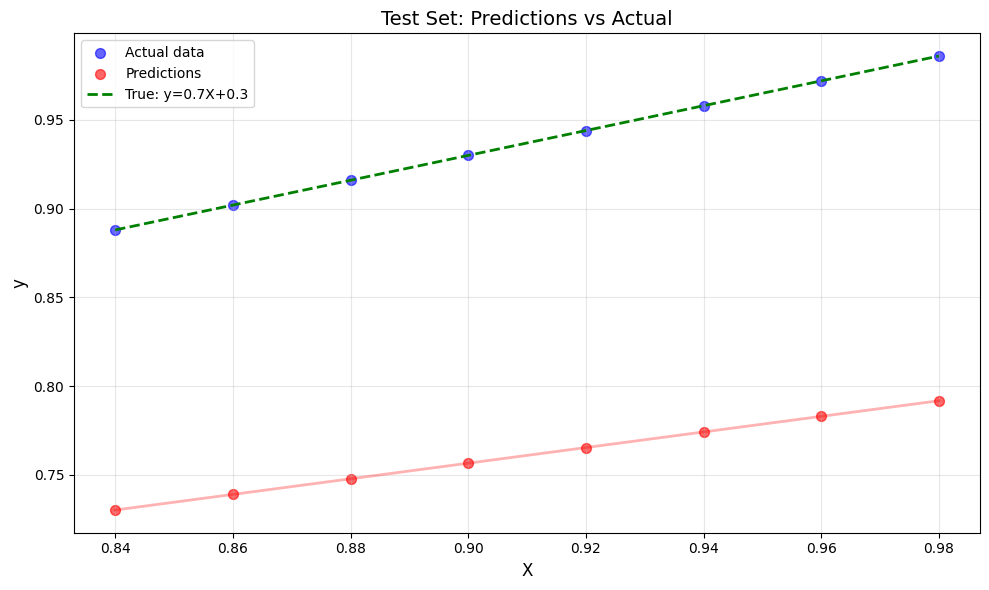

Predictions visualized!


In [12]:

# TODO: Plot test predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, c='b', s=50, alpha=0.6, label='Actual data')
plt.scatter(X_test, test_predictions, c='r', s=50, alpha=0.6, label='Predictions')
plt.plot(X_test, test_predictions, 'r-', linewidth=2, alpha=0.3)
plt.plot(X_test, weight * X_test + bias, 'g--', linewidth=2, label=f'True: y={weight}X+{bias}')
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend(fontsize=10)
plt.title('Test Set: Predictions vs Actual', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Predictions visualized!")

In [12]:
print("\n" + "=" * 60)
print("Part 4: Saving the Model")
print("=" * 60)


Part 4: Saving the Model


In [13]:

# TODO: Create directory if it doesn't exist
os.makedirs('saved_models', exist_ok=True)

In [14]:

# TODO: Save model state dict
model_path = 'saved_models/linear_model.pth'
torch.save(model.state_dict(), model_path)

print(f"Model saved to: {model_path}")

Model saved to: saved_models/linear_model.pth


In [15]:

# TODO: Verify file was created
if os.path.exists(model_path):
    file_size = os.path.getsize(model_path)
    print(f"File size: {file_size} bytes")
else:
    print("Error: File was not created!")

File size: 1526 bytes


In [16]:
print("\n" + "=" * 60)
print("Part 5: Loading the Model")
print("=" * 60)


Part 5: Loading the Model


In [16]:

# TODO: Create new model instance
loaded_model = LinearRegressionModel()
print("Created new model instance")
print(f"Parameters before loading:")
print(f"  Weight: {loaded_model.weight.item():.4f}")
print(f"  Bias: {loaded_model.bias.item():.4f}")

Created new model instance
Parameters before loading:
  Weight: 0.2345
  Bias: 0.2303


In [18]:

# TODO: Load saved state
loaded_model.load_state_dict(torch.load(model_path))
loaded_model.eval()

print(f"\nParameters after loading:")
print(f"  Weight: {loaded_model.weight.item():.4f}")
print(f"  Bias: {loaded_model.bias.item():.4f}")


Parameters after loading:
  Weight: 0.4398
  Bias: 0.3607


In [19]:

# TODO: Verify loaded model works
with torch.no_grad():
    loaded_predictions = loaded_model(X_test)
    verification_loss = criterion(loaded_predictions, y_test)

print(f"\nVerification:")
print(f"  Test Loss: {verification_loss.item():.4f}")
print(f"  Matches original: {torch.allclose(test_predictions, loaded_predictions)}")


Verification:
  Test Loss: 0.0311
  Matches original: True


In [20]:
print("\n" + "=" * 60)
print("Part 6: Saving Complete Checkpoints")
print("=" * 60)


Part 6: Saving Complete Checkpoints


In [20]:

# TODO: Create checkpoint dictionary
checkpoint = {
    'epoch': epochs,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_loss': criterion(model(X_train), y_train).item(),
    'val_loss': criterion(model(X_val), y_val).item(),
    'test_loss': test_loss.item(),
    'hyperparameters': {
        'learning_rate': 0.01,
        'weight': weight,
        'bias': bias
    },
    'timestamp': datetime.datetime.now().isoformat(),
    'pytorch_version': torch.__version__,
}

In [21]:

# TODO: Save checkpoint
# Note: .tar is the PyTorch convention for checkpoints (contains more than just state_dict)
checkpoint_path = 'saved_models/checkpoint.tar'
torch.save(checkpoint, checkpoint_path)

print(f"Checkpoint saved to: {checkpoint_path}")
print(f"Checkpoint contents:")
for key in checkpoint.keys():
    print(f"  {key}")

Checkpoint saved to: saved_models/checkpoint.tar
Checkpoint contents:
  epoch
  model_state_dict
  optimizer_state_dict
  train_loss
  val_loss
  test_loss
  hyperparameters
  timestamp
  pytorch_version


In [23]:
print("\n" + "=" * 60)
print("Part 7: Loading from Checkpoint")
print("=" * 60)


Part 7: Loading from Checkpoint


In [22]:

# TODO: Load checkpoint
loaded_checkpoint = torch.load(checkpoint_path)

print(f"Loaded checkpoint from epoch {loaded_checkpoint['epoch']}")
print(f"Train loss: {loaded_checkpoint['train_loss']:.4f}")
print(f"Val loss: {loaded_checkpoint['val_loss']:.4f}")
print(f"Test loss: {loaded_checkpoint['test_loss']:.4f}")
print(f"Hyperparameters: {loaded_checkpoint['hyperparameters']}")

Loaded checkpoint from epoch 100
Train loss: 0.0035
Val loss: 0.0189
Test loss: 0.0311
Hyperparameters: {'learning_rate': 0.01, 'weight': 0.7, 'bias': 0.3}


In [23]:

# TODO: Restore model and optimizer
restored_model = LinearRegressionModel()
restored_model.load_state_dict(loaded_checkpoint['model_state_dict'])
restored_model.eval()

restored_optimizer = optim.SGD(restored_model.parameters(), lr=0.01)
restored_optimizer.load_state_dict(loaded_checkpoint['optimizer_state_dict'])

print("\nModel and optimizer restored successfully!")


Model and optimizer restored successfully!


In [26]:
print("\n" + "=" * 60)
print("Exercises")
print("=" * 60)


Exercises


In [48]:
# Exercise 1: Multiple model versions
print("\nExercise 1: Save multiple model versions")
print("Tip: Use f-strings for filenames: f'model_lr{lr}.pth'")
# TODO: Train models with different learning rates
# TODO: Save each with a different name

learning_rates = [0.1, 0.01, 0.001]
saved_path = {}

for learning_rate in learning_rates:
    print(f"\nTraining model with learning rate: {learning_rate}")
    print("-"*60)
    model = LinearRegressionModel()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    # training
    for epoch in range(100):
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            val_pred = model(X_val)
            loss = criterion(val_pred, y_val)
    
    model_path = f'saved_models/linear_model_lr{learning_rate}.pth'
    torch.save(model.state_dict(), model_path)
    print(f"Model saved to: {model_path}")

    if os.path.exists(model_path):
        file_size = os.path.getsize(model_path)
        print(f"File size: {file_size} bytes")
    else:
        print("Error: File was not created!")
    saved_path[learning_rate] = {"path" : model_path}

# TODO: Load and compare them
for learning_rate in learning_rates:
    print(f"\nLoading model with learning rate: {learning_rate}")
    print('='*60)
    loaded_model = LinearRegressionModel()
    loaded_model.load_state_dict(torch.load(saved_path[learning_rate]['path']))
    loaded_model.eval()
    
    print(f"\nParameters after loading:")
    print(f"  Weight: {loaded_model.weight.item():.4f}")
    print(f"  Bias: {loaded_model.bias.item():.4f}")

    with torch.no_grad():
        preds = loaded_model(X_test)
        test_loss = criterion(preds, y_test)

    print(f"  Test Loss: {test_loss.item():.4f}")



Exercise 1: Save multiple model versions
Tip: Use f-strings for filenames: f'model_lr{lr}.pth'

Training model with learning rate: 0.1
------------------------------------------------------------
Model saved to: saved_models/linear_model_lr0.1.pth
File size: 1562 bytes

Training model with learning rate: 0.01
------------------------------------------------------------
Model saved to: saved_models/linear_model_lr0.01.pth
File size: 1568 bytes

Training model with learning rate: 0.001
------------------------------------------------------------
Model saved to: saved_models/linear_model_lr0.001.pth
File size: 1574 bytes

Loading model with learning rate: 0.1

Parameters after loading:
  Weight: 0.6149
  Bias: 0.3300
  Test Loss: 0.0023

Loading model with learning rate: 0.01

Parameters after loading:
  Weight: -1.6780
  Bias: 1.0974
  Test Loss: 1.8796

Loading model with learning rate: 0.001

Parameters after loading:
  Weight: 0.1107
  Bias: -1.2239
  Test Loss: 4.2446


In [61]:

# Exercise 2: Inference on new data
print("\nExercise 2: Inference on new data")
print("Tip: Try X values like -0.5, 1.5 (outside 0-1 range)")

# TODO: Create new data points outside training range
nd1 = torch.randn(30)  
mask = (nd1 < 0) | (nd1 > 1)
nd = nd1[mask] 
nd_true = weight * nd + bias

# TODO: Make predictions
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(saved_path[0.1]['path']))
loaded_model.eval()

with torch.no_grad():
    preds = loaded_model(nd)
    test_loss = criterion(preds, nd_true)

print(f"Ground truth: {nd_true[:10]}")
print(f"Model Prediction: {preds[:10]}")
print(f"Test Loss: {test_loss.item():.4f}")

# TODO: Discuss extrapolation


Exercise 2: Inference on new data
Tip: Try X values like -0.5, 1.5 (outside 0-1 range)
Ground truth: tensor([-0.3304, -0.2877,  0.0195, -0.7797,  1.1002,  1.2494, -0.3766, -0.1050,
         1.1661, -0.3019])
Model Prediction: tensor([-0.2238, -0.1863,  0.0837, -0.6184,  1.0330,  1.1640, -0.2643, -0.0257,
         1.0909, -0.1987])
Test Loss: 0.0120



Exercise 3: Model comparison
Tip: Plot multiple learned lines on one graph

Loading model with learning rate: 0.1

Loading model with learning rate: 0.01

Loading model with learning rate: 0.001

10 predictions of model learning rate: 0.1
tensor([[0.8465],
        [0.8588],
        [0.8711],
        [0.8834],
        [0.8957]])

10 predictions of model learning rate: 0.01
tensor([[-0.3122],
        [-0.3457],
        [-0.3793],
        [-0.4129],
        [-0.4464]])

10 predictions of model learning rate: 0.001
tensor([[-1.1308],
        [-1.1286],
        [-1.1264],
        [-1.1242],
        [-1.1220]])


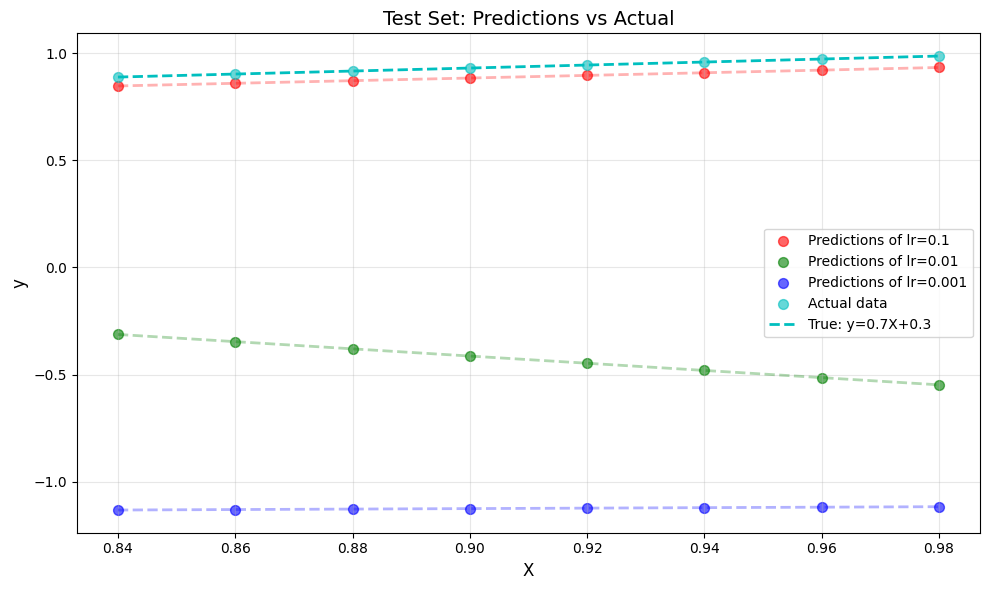

In [60]:

# Exercise 3: Model comparison
print("\nExercise 3: Model comparison")
print("Tip: Plot multiple learned lines on one graph")
# TODO: Load multiple saved models
predictions = {}
for learning_rate in learning_rates:
    print(f"\nLoading model with learning rate: {learning_rate}")
    print('='*60)
    loaded_model = LinearRegressionModel()
    loaded_model.load_state_dict(torch.load(saved_path[learning_rate]['path']))
    loaded_model.eval()
    
    with torch.no_grad():
        preds = loaded_model(X_test)
        test_loss = criterion(preds, y_test)
    
    predictions[learning_rate] = preds

# TODO: Compare their predictions
for learning_rate in learning_rates:
    print(f"\n10 predictions of model learning rate: {learning_rate}")
    print(predictions[learning_rate][:5])

# TODO: Visualize all on same plot
colors = ['r', 'g', 'b']
plt.figure(figsize=(10, 6))
for learning_rate, color in zip(learning_rates, colors):
    plt.scatter(X_test, predictions[learning_rate], c=color, s=50, alpha=0.6, label=f'Predictions of lr={learning_rate}')
    plt.plot(X_test, predictions[learning_rate], c=color, linestyle='--', linewidth=2, alpha=0.3)
plt.scatter(X_test, y_test, c='c', s=50, alpha=0.6, label='Actual data')
plt.plot(X_test, weight * X_test + bias, 'c--', linewidth=2, label=f'True: y={weight}X+{bias}')
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend(fontsize=10)
plt.title('Test Set: Predictions vs Actual', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



Exercise 4: Save training history
Tip: Add 'train_losses': train_losses to checkpoint
Checkpoint saved to: saved_checkpoints/checkpoint_epoch0.tar
Checkpoint saved to: saved_checkpoints/checkpoint_epoch2.tar
Checkpoint saved to: saved_checkpoints/checkpoint_epoch4.tar
Checkpoint saved to: saved_checkpoints/checkpoint_epoch6.tar
Checkpoint saved to: saved_checkpoints/checkpoint_epoch8.tar
Checkpoint saved to: saved_checkpoints/checkpoint_epoch10.tar
Checkpoint saved to: saved_checkpoints/checkpoint_epoch12.tar
Checkpoint saved to: saved_checkpoints/checkpoint_epoch14.tar
Checkpoint saved to: saved_checkpoints/checkpoint_epoch16.tar
Checkpoint saved to: saved_checkpoints/checkpoint_epoch18.tar
Checkpoint saved to: saved_checkpoints/checkpoint_epoch20.tar
Checkpoint saved to: saved_checkpoints/checkpoint_epoch22.tar
Checkpoint saved to: saved_checkpoints/checkpoint_epoch24.tar
Checkpoint saved to: saved_checkpoints/checkpoint_epoch26.tar
Checkpoint saved to: saved_checkpoints/checkpoint_

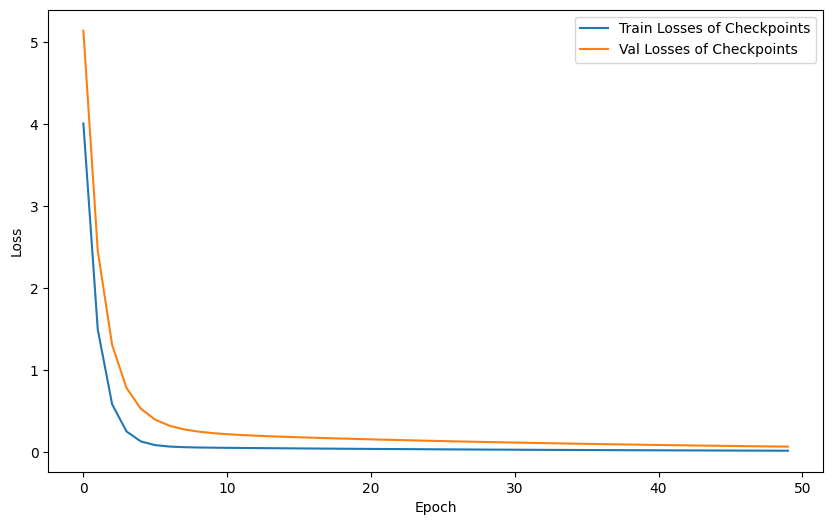

In [69]:
# Exercise 4: Save training history
print("\nExercise 4: Save training history")
print("Tip: Add 'train_losses': train_losses to checkpoint")
# TODO: Save loss curves with checkpoint
os.makedirs('saved_checkpoints', exist_ok=True)
checkpoints = []
model = LinearRegressionModel()
optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.MSELoss()
for epoch in range(100):
    model.train()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_pred = model(X_val)
        loss = criterion(val_pred, y_val)
            
    if epoch%2==0:
        checkpoint = {
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_loss': criterion(y_pred, y_train).item(),
            'val_loss': criterion(val_pred, y_val).item(),
            'hyperparameters': {
                'learning_rate': 0.1,
                'weight': weight,
                'bias': bias
            },
            'timestamp': datetime.datetime.now().isoformat(),
        }
        checkpoint_path = f'saved_checkpoints/checkpoint_epoch{epoch}.tar'
        torch.save(checkpoint, checkpoint_path)
        print(f"Checkpoint saved to: {checkpoint_path}")

# TODO: Load and plot training history
# TODO: Compare multiple training runs

train_losses = []
val_losses = []
for i in range(50):
    checkpoint_path = f'saved_checkpoints/checkpoint_epoch{i*2}.tar'
    loaded_checkpoint = torch.load(checkpoint_path)
    train_losses.append(loaded_checkpoint['train_loss']),
    val_losses.append(loaded_checkpoint['val_loss'])

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Losses of Checkpoints')
plt.plot(val_losses, label='Val Losses of Checkpoints')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



Exercise 5: Resume training
Tip: Use checkpoint['epoch'] as starting point


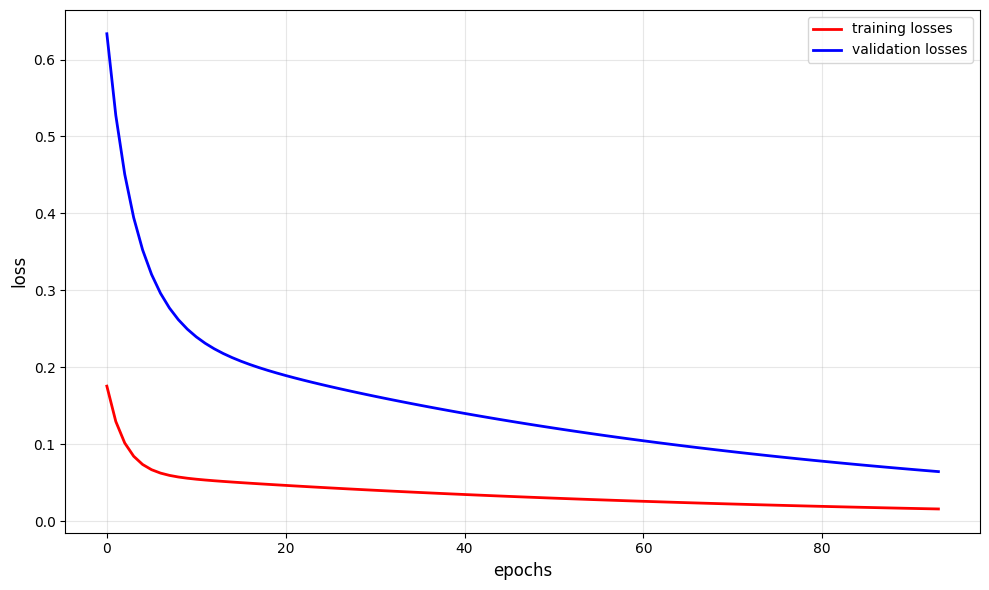

In [71]:
# Exercise 5: Resume training
print("\nExercise 5: Resume training")
print("Tip: Use checkpoint['epoch'] as starting point")

# TODO: Load checkpoint
checkpoint_path = 'saved_checkpoints/checkpoint_epoch6.tar'
loaded_checkpoint = torch.load(checkpoint_path)
restored_model = LinearRegressionModel()
restored_model.load_state_dict(loaded_checkpoint['model_state_dict'])

restored_optimizer = optim.SGD(restored_model.parameters(), lr=0.1)
restored_optimizer.load_state_dict(loaded_checkpoint['optimizer_state_dict'])
train_losses = []
val_losses = []

# TODO: Continue training from saved epoch
for epoch in range(loaded_checkpoint['epoch'], 100):
    # training
    restored_model.train()
    
    y_pred = restored_model(X_train)
    loss = criterion(y_pred, y_train)

    restored_optimizer.zero_grad()
    loss.backward()
    restored_optimizer.step()

    train_losses.append(loss.item())
    
    # validation
    restored_model.eval
    with torch.no_grad():
        val_pred = restored_model(X_val)
        val_loss = criterion(val_pred, y_val)
        val_losses.append(val_loss.item())

# TODO: Verify it continues correctly
plt.figure(figsize=(10, 6))
plt.plot(train_losses, 'r', linewidth=2, label='training losses')
plt.plot(val_losses, 'b', linewidth=2, label='validation losses')
plt.xlabel('epochs', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
print("\n" + "=" * 60)
print("Exercise 4 Complete!")
print("Remember: Visualize, visualize, visualize!")
print("=" * 60)
